In [1]:
%matplotlib inline
import parameters
import HULib
import numpy as np
import pandas as pd
import glue
import matplotlib.pylab as plt
import seaborn as sns
parameters.glueme = True  # load data to glue for manipulation of the Universe
import itertools
marker = itertools.cycle((',', '+', '.', 'o', '*'))

In [2]:
import hdbscan
import debacl
from debacl.level_set_tree import LevelSetTree
import fastcluster
import sklearn.cluster as cluster
import scipy.cluster
import sklearn.datasets
import time
sns.set_context('poster')
sns.set_palette('Paired', 10)
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 8, 'linewidths':0}

In [3]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

In [4]:
data = np.load('clusterable_data.npy')

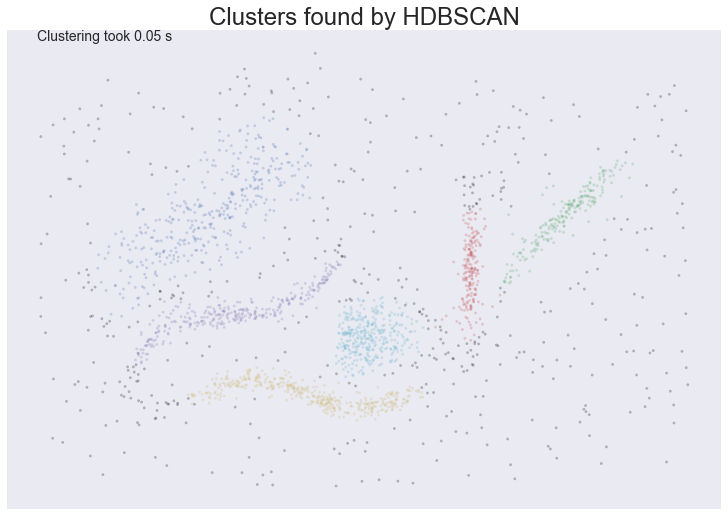

In [5]:
hdbscan_ = hdbscan.HDBSCAN()
hdbscan_data =  hdbscan_.fit(data)
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':25})

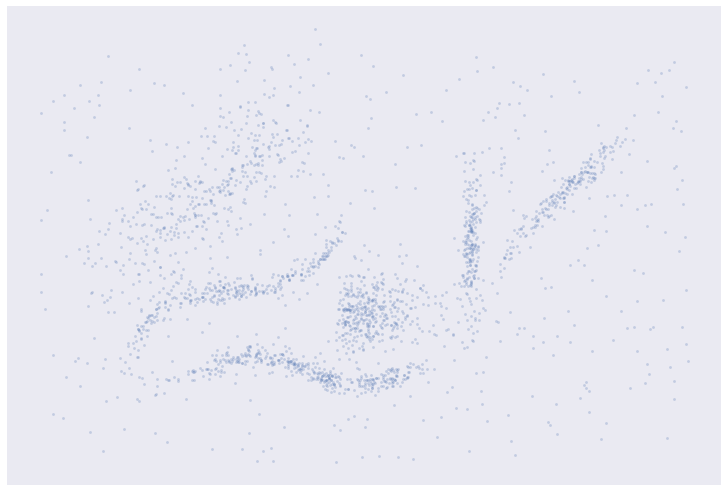

In [6]:
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

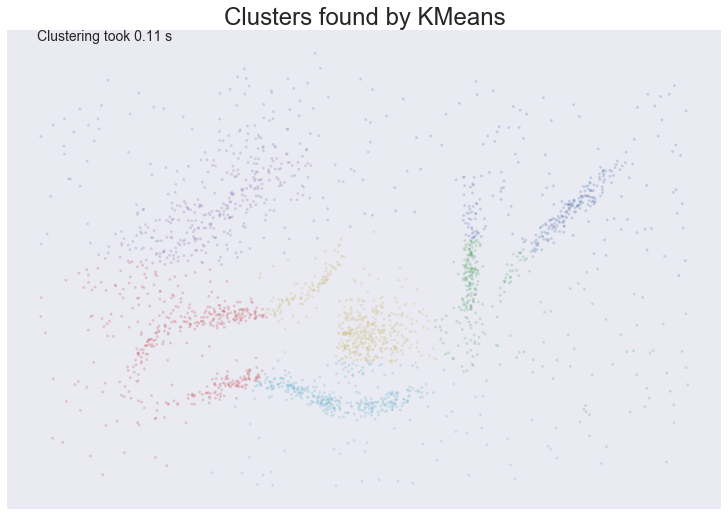

In [7]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':6})

# Load Galaxy Data

Index(['RA', 'DEC', 'ID', 'Z', 'NZ'], dtype='object')
Index(['RA', 'DEC', 'ID', 'Z', 'NZ', 'CosRA', 'SinRA', 'CosDEC', 'SinDEC',
       'distance0', 'distance', 'density', 'Me', 'alpha', 'x', 'y', 'z'],
      dtype='object')
Index(['RA', 'DEC', 'ID', 'Z', 'NZ'], dtype='object')
Index(['RA', 'DEC', 'ID', 'Z', 'NZ', 'CosRA', 'SinRA', 'CosDEC', 'SinDEC',
       'distance0', 'distance', 'density', 'Me', 'alpha', 'x', 'y', 'z'],
      dtype='object')
Index(['RA', 'DEC', 'ID', 'Z', 'NZ'], dtype='object')
Index(['RA', 'DEC', 'ID', 'Z', 'NZ', 'CosRA', 'SinRA', 'CosDEC', 'SinDEC',
       'distance0', 'distance', 'density', 'Me', 'alpha', 'x', 'y', 'z'],
      dtype='object')
Index(['RA', 'DEC', 'ID', 'Z', 'NZ'], dtype='object')
Index(['RA', 'DEC', 'ID', 'Z', 'NZ', 'CosRA', 'SinRA', 'CosDEC', 'SinDEC',
       'distance0', 'distance', 'density', 'Me', 'alpha', 'x', 'y', 'z'],
      dtype='object')


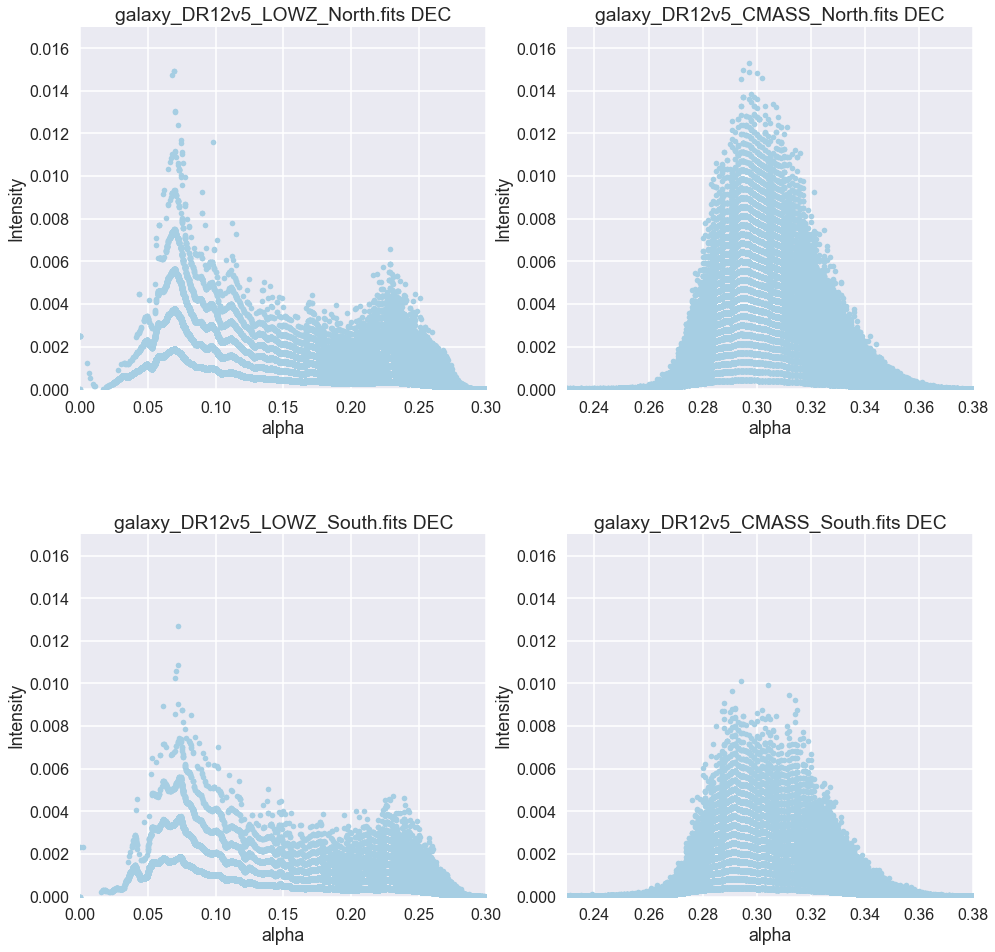

In [8]:
parameters.saveme=True
myKeys=[
('DEC', 'galaxy_DR12v5_LOWZ_North.fits'),
('DEC', 'galaxy_DR12v5_CMASS_North.fits'),
('DEC', 'galaxy_DR12v5_LOWZ_South.fits'),
('DEC', 'galaxy_DR12v5_CMASS_South.fits'),   
('RA', 'galaxy_DR12v5_LOWZ_North.fits'),
('RA', 'galaxy_DR12v5_CMASS_North.fits'),
('RA', 'galaxy_DR12v5_LOWZ_South.fits'),
('RA', 'galaxy_DR12v5_CMASS_South.fits')]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))
fig.subplots_adjust(hspace=.4)

position = [(0,0),(0,1),(1,0),(1,1)]
ranges= [(0,0.3),(0.23,0.38),(0,0.3),(0.23,0.38)]
tops= [(0,0.017),(0,0.017),(0,0.017),(0,0.017)]
i=0
highY=0.03
for key, value in myKeys[0:4]:
    myGalaxy = HULib.get_BOSS_data(parameters.sdssAddress + value)
    myGalaxy = HULib.fix_BOSS_data(myGalaxy)
    data=pd.DataFrame({'Me' : myGalaxy.groupby( ['alpha', key])['Me'].sum()}).reset_index()
    data=data[[0,2]]
    data.plot(ax=axes[position[i]], x='alpha', y='Me', legend=False,xlim=ranges[i],ylim=[0,0.017],style='.')
    axes[position[i]].set_title(value + ' ' + key )
    axes[position[i]].set_ylabel("Intensity")
    axes[position[i]].set_xlabel("alpha")
    i=i+1
if parameters.saveme:
    fig.savefig(parameters.imgAddress + 'DasKlingelnDesUniversumsD_DEC.png', dpi=300)


Index(['RA', 'DEC', 'ID', 'Z', 'NZ'], dtype='object')
Index(['RA', 'DEC', 'ID', 'Z', 'NZ', 'CosRA', 'SinRA', 'CosDEC', 'SinDEC',
       'distance0', 'distance', 'density', 'Me', 'alpha', 'x', 'y', 'z'],
      dtype='object')


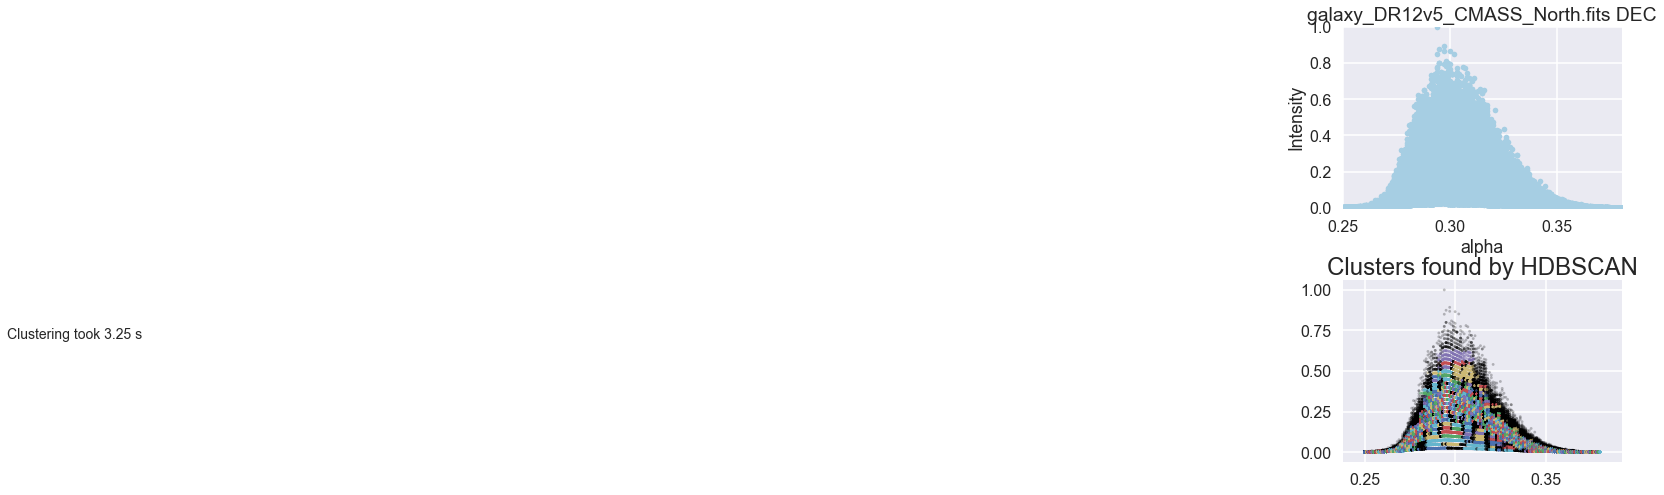

In [9]:
import warnings
warnings.filterwarnings("ignore")
myKeys=[
        ('DEC', 'galaxy_DR12v5_LOWZ_North.fits'),
        ('DEC', 'galaxy_DR12v5_CMASS_North.fits'),
        ('DEC', 'galaxy_DR12v5_LOWZ_South.fits'),
        ('DEC', 'galaxy_DR12v5_CMASS_South.fits'),
        ('RA', 'galaxy_DR12v5_LOWZ_North.fits'),
        ('RA', 'galaxy_DR12v5_CMASS_North.fits'),
        ('RA', 'galaxy_DR12v5_LOWZ_South.fits'),
        ('RA', 'galaxy_DR12v5_CMASS_South.fits')]


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 8))
fig.subplots_adjust(hspace=.4)

key,value=myKeys[1]

myGalaxy = HULib.get_BOSS_data(parameters.sdssAddress + value)
myGalaxy = HULib.fix_BOSS_data(myGalaxy)
data=pd.DataFrame({'Me' : myGalaxy.groupby( ['alpha', key])['Me'].sum()}).reset_index()
data = data[[0, 2]]
ind=(data.alpha >= 0.25) & (data.alpha <= 0.38)
yy=data[ind]
yy.dropna(inplace=True)
yy.loc[:,'Me']=yy.Me/yy.Me.max()
yy.plot(ax=axes[0], x='alpha', y='Me', legend=False,xlim=[0.25,0.38],ylim=[0,1.0],style='.')
axes[0].set_title(value + ' ' + key )
axes[0].set_ylabel("Intensity")
axes[0].set_xlabel("alpha")
hdbscan_ = hdbscan.HDBSCAN()

hdbscan_data =  hdbscan_.fit(yy)
plot_clusters(yy.values, hdbscan.HDBSCAN, (), {'min_cluster_size':35})
frame = plt.gca()
fig = plt.gcf()
frame.axes.get_xaxis().set_visible(True)
frame.axes.get_yaxis().set_visible(True)
plt.show()



In [10]:
1.6737236E-27/(0.19E-15)**3

2.4401860329494092e+20

In [11]:
yy.Me.max()

1.0